<a href="https://colab.research.google.com/github/s-eee/KeibaAI/blob/master/binary_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

csv = pd.read_csv("/content/drive/MyDrive/競馬/csvデータ/カテゴリ化/learning_data.csv", index_col=0)

# 教師データを分類
csv["順位"].replace({1:1, 2:1, 3:1, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}, inplace=True)

csv

,レース数,馬場,頭数,前レース日数,１レース前順位,２レース前順位,３レース前順位,４レース前順位,５レース前順位,積載重量,...,ジョッキー名_\n西謙一(ばんえい)\n,ジョッキー名_\n赤塚健(ばんえい)\n,ジョッキー名_\n金田利(ばんえい)\n,ジョッキー名_\n鈴木恵(ばんえい)\n,ジョッキー名_\n長澤幸(ばんえい)\n,ジョッキー名_\n阿部武(ばんえい)\n,ジョッキー名_引退,牡0牝1_0.0,牡0牝1_1.0,牡0牝1_2.0
0,1.0,2.4,6.0,7.0,1,3,6,6,4,660.0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,2.4,6.0,7.0,8,2,7,6,5,640.0,...,1,0,0,0,0,0,0,0,1,0
2,1.0,2.4,6.0,7.0,5,8,9,2,4,660.0,...,0,0,0,0,1,0,0,1,0,0
3,1.0,2.4,6.0,7.0,3,3,5,4,1,640.0,...,0,0,0,1,0,0,0,0,1,0
4,1.0,2.4,6.0,7.0,5,5,7,6,5,660.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155825,11.0,1.1,7.0,16.0,0,3,3,5,7,660.0,...,0,0,0,1,0,0,0,1,0,0
155826,11.0,1.1,7.0,10.0,8,8,9,1,5,650.0,...,0,0,0,0,0,0,0,1,0,0
155827,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
155828,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ndarrayに変換後、出走馬の順番のみをシャッフル
data = csv.values
row = data.shape[0]
col = data.shape[1]

data = data.reshape(row // 10, 10, col)

for i in range(data.shape[0]):
    np.random.shuffle(data[i])

data = data.reshape(row,col)

In [ ]:
# 教師データ
T = data[:, 13]
# 学習データ
X = np.delete(data, 13, axis=1)

In [ ]:
X = X.astype('float64')
T = T.astype("int")

# 標準化
def z_score(X):
    mean = X.mean()
    std = X.std()
    print(mean)
    print(std)
    X -= mean
    # X /= std + 1e-7
    X /= std
    return X

# 正規化
def min_max(X):
    min = X.min()
    max = X.max()
    print(min)
    print(max)
    X = (X - min)/(max - min)
    return X

# X = min_max(X)
X = z_score(X)

34.404076639868435
164.14767907079164


In [ ]:
test_len = int(X.shape[0] * 0.9)
test_len = round(test_len, -1)
# 10%をテストデータに使用
x_train = X[:test_len]
x_test = X[test_len:]
t_train = T[:test_len]
t_test = T[test_len:]

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(140250, 43)
(140250,)
(15580, 43)
(15580,)


In [ ]:
from tensorflow import keras
from keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train[1].shape)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.Recall()]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2816      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 3

In [ ]:
%%time
epoch = 3000
batch_size = 4096

# val_recallが最高時のモデルを保存
Checkpoint = ModelCheckpoint(filepath="checkpoint.h5",
                             monitor="val_recall",
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode="max",
                             )

history = model.fit(
    x_train,
    t_train,
    epochs=epoch,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.3,
    callbacks=[Checkpoint]
)

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1751: val_recall did not improve from 0.29282
24/24 [==============================] - 0s 12ms/step - loss: 0.5261 - recall: 0.2291 - val_loss: 0.5512 - val_recall: 0.2410
Epoch 1752/3000
24/24 [==============================] - ETA: 0s - loss: 0.5260 - recall: 0.2340
Epoch 1752: val_recall did not improve from 0.29282
24/24 [==============================] - 0s 11ms/step - loss: 0.5260 - recall: 0.2340 - val_loss: 0.5495 - val_recall: 0.1936
Epoch 1753/3000
24/24 [==============================] - ETA: 0s - loss: 0.5261 - recall: 0.2312
Epoch 1753: val_recall did not improve from 0.29282
24/24 [==============================] - 0s 11ms/step - loss: 0.5261 - recall: 0.2312 - val_loss: 0.5487 - val_recall: 0.1752
Epoch 1754/3000
18/24 [=====================>........] - ETA: 0s - loss: 0.5254 - recall: 0.2200
Epoch 1754: val_recall did not improve from 0.29282
24/24 [==============================] - 0s 10ms/step - loss: 0.5260 - recall: 0.2308 - val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower rigth'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


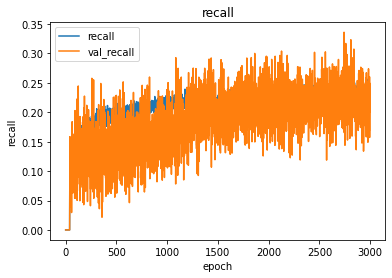

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper rigth'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


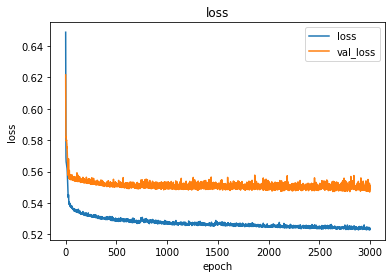

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.plot(history.history["recall"], "-", label="recall")
    plt.plot(history.history["val_recall"], "-", label="val_recall")
    plt.title("recall")
    plt.xlabel("epoch")
    plt.ylabel("recall")
    plt.legend(loc='lower rigth')
    plt.show()

    plt.plot(history.history["loss"], "-", label="loss")
    plt.plot(history.history["val_loss"], "-", label="val_loss")
    plt.title("loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(loc="upper rigth")
    plt.show()
    

plot_history(history)

In [ ]:
model.save("model.h5")

In [ ]:
# 過去レースの当選回数をカウント
def evaluation(x, t, model):
    y_list = []
    # 複勝当選回数
    score = 0
    # 精度
    acc = 0
    # 複勝
    first_score = 0
    second_score = 0
    third_score = 0
    # ワイド
    wide = 0
    # 三連複
    sanrenpuku = 0
    # 回数
    loop = 5000
    # loop = x_test.shape[0]
    col = x_test.shape[1]

    for i in range(loop):
        x = x_test[i].reshape(1, col)
        y = model.predict(x)
        y_list.append(y)
    for i in range(len(y_list) // 10):
        pre = y_list[i*10 : i*10+10]
        cor = t[i*10 : i*10+10]
        max_idx1, max_idx2, max_idx3 = get_max_idx(pre)
        san = 0
        w = 0
        if cor[max_idx1] == 1:
            score += 1
            first_score += 1
            san += 1
            w += 1
        if cor[max_idx2] == 1:
            score += 1
            second_score += 1
            san += 1
            w += 1
        if cor[max_idx3] == 1:
            score += 1
            third_score += 1
            san += 1
        if san == 3:
            sanrenpuku += 1
        if w == 2:
            wide += 1
    acc = score / (loop * 0.3)

    print(f"複勝当選数（予想1番目）：{first_score} / {loop//10} 複勝当選率　：　{first_score / (loop//10)}")
    print(f"複勝当選数（予想２番目）：{second_score} / {loop//10} 複勝当選率　：　{second_score / (loop//10)}")
    print(f"複勝当選数（予想3番目）：{third_score} / {loop//10} 複勝当選率　：　{third_score / (loop//10)}")
    print(f"複勝当選馬数(合計)：{score}/{loop * 0.3}  正解率　: {acc}")
    print(f"ワイド当選回数　：　{wide} / {loop // 10} ワイド当選率　：　{wide / (loop//10)}")
    print(f"三連複当選回数　：　{sanrenpuku} / {loop // 10} 三連複当選率　：　{sanrenpuku / (loop//10)}")

    return acc, first_score, sanrenpuku, wide

def get_max_idx(pre):
    # 予想数値上位３頭のindexを取得
    max_idx1 = 0    
    max_idx2 = 0    
    max_idx3 = 0
    sorted_pre = sorted(pre)
    max_idx1 = pre.index(sorted_pre[-1])
    max_idx2 = pre.index(sorted_pre[-2])
    max_idx3 = pre.index(sorted_pre[-3])
    return max_idx1, max_idx2, max_idx3

In [ ]:
%%time

model = keras.models.load_model('model.h5')
evaluation(x_test, t_test, model)
test_loss, test_acc = model.evaluate(x_test, t_test,verbose=1)
print(test_loss)
print(test_acc)

複勝当選数（予想1番目）：269 / 500 複勝当選率　：　0.538
複勝当選数（予想２番目）：224 / 500 複勝当選率　：　0.448
複勝当選数（予想3番目）：206 / 500 複勝当選率　：　0.412
複勝当選馬数(合計)：699/1500.0  正解率　: 0.466
ワイド当選回数　：　106 / 500 ワイド当選率　：　0.212
三連複当選回数　：　24 / 500 三連複当選率　：　0.048
487/487 [==============================] - 2s 3ms/step - loss: 0.5406 - recall: 0.2638
0.5406374931335449
0.2637997567653656
CPU times: user 3min 4s, sys: 7.41 s, total: 3min 12s
Wall time: 3min 12s


In [ ]:
%%time

model = keras.models.load_model('checkpoint.h5')
evaluation(x_test, t_test, model)
test_loss, test_acc = model.evaluate(x_test, t_test,verbose=1)
print(test_loss)
print(test_acc)

複勝当選数（予想1番目）：271 / 500 複勝当選率　：　0.542
複勝当選数（予想２番目）：224 / 500 複勝当選率　：　0.448
複勝当選数（予想3番目）：202 / 500 複勝当選率　：　0.404
複勝当選馬数(合計)：697/1500.0  正解率　: 0.4646666666666667
ワイド当選回数　：　107 / 500 ワイド当選率　：　0.214
三連複当選回数　：　22 / 500 三連複当選率　：　0.044
487/487 [==============================] - 2s 3ms/step - loss: 0.5462 - recall: 0.3652
0.5462357997894287
0.3652118146419525
CPU times: user 3min 5s, sys: 7.4 s, total: 3min 12s
Wall time: 3min 11s
